Welcome to my code about Real Estate prices and learning about what can affect the location of the most important part about houses; their price! For the first lines here, the code reaches and generates the CSV file from the website Kagglehub. It goes directly through your computer to find the path and directory that leads to the csv file so the code can access it.

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from prettytable import PrettyTable
from google.colab import drive

# Download latest version of Kagglehub, along with the file
path = kagglehub.dataset_download("fratzcan/usa-house-prices")

print("Path to dataset files:", path)

#Finding the name of the files and where it's located
files = os.listdir(path)
print("Files in dataset folder:", files)

#Search the files for one that ends in .csv assuming theres no other ones
data = [f for f in files if f.endswith(".csv")]

#Running/ finding the file
if data:
    csv_path = os.path.join(path, data[0])  # Get the first (and should be only) CSV file
    data = pd.read_csv(csv_path)

print(type(data))

100%|██████████| 119k/119k [00:00<00:00, 61.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fratzcan/usa-house-prices/versions/1
Files in dataset folder: ['USA Housing Dataset.csv']
<class 'pandas.core.frame.DataFrame'>


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

###**How old is the data?**

The survey was taken beginning on May 2nd, 2014, and studies ended at midnight on July 10th, 2014

In [3]:
# Find min and max date (string comparison)
earliest_date = data["date"].min()
latest_date = data["date"].max()

print("Earliest Date:", earliest_date)
print("Latest Date:", latest_date)

Earliest Date: 2014-05-02 00:00:00
Latest Date: 2014-07-10 00:00:00


###**Where is the data located?**###

All of the data is based in the United States and in multiple cities, but all the cities are based in Washington, U.S. and not in any other state. Seattle and Renton are major cities in Washington, but some red ehrrings are cities such as Auburn and Des Moines, which is a major city in Alabama and the Capital of Iowa respectfully. However, there are cities of the same name in Washington as well. Therefore, all the data is from Washington State.

In [4]:
#Counts how many different countries there are
num_unique_countries = data["country"].nunique()
print("Number of unique countries:", num_unique_countries)

#Counts the amount of values associated with a country
country_counts = data["city"].value_counts()
print(country_counts)

Number of unique countries: 1
city
Seattle               1415
Renton                 261
Bellevue               260
Redmond                209
Kent                   167
Kirkland               166
Issaquah               162
Auburn                 162
Sammamish              158
Federal Way            131
Shoreline              112
Woodinville            103
Maple Valley            90
Mercer Island           81
Snoqualmie              65
Burien                  64
Kenmore                 58
Des Moines              52
North Bend              45
Covington               39
Duvall                  39
Lake Forest Park        33
Newcastle               31
Bothell                 30
SeaTac                  29
Enumclaw                28
Tukwila                 28
Vashon                  28
Carnation               18
Normandy Park           16
Medina                  11
Clyde Hill              10
Fall City                9
Black Diamond            7
Pacific                  6
Yarrow Point        

###**How was the data acquired?**###

Since the data has all of its data in the U.S and more specifically Washington State, it is safe to assume the creator recieved this information from Washington State related sets. For example, websites such as [Washington Waterfronts](https://www.washingtonwaterfronts.com/market-statistics/) contain real estate information about the state of Washington, so the people who produced this dataset could've recieved information here.

###**What are the attributes of each dataset column? What type of data do theses attributes contain?**###

The USA Housing dataset provides multiple sets of information, ranging from prices to details about the home, property, home dimensions, home statistics, and location.

| Column    | Summary  | Type  |
|-----------|----------|-------|
|Date|The date when the property was sold. This feature helps in understanding the temporal trends in property prices. |Nominal|
|Price| The sale price of the property in USD. This is the target variable we aim to predict. |Ratio|
|Bedrooms| The number of bedrooms in the property. Generally, properties with more bedrooms tend to have higher prices. |Ratio|
|Bathrooms| The number of bathrooms in the property. Similar to bedrooms, more bathrooms can increase a property’s value. |Ratio|
|Sqft Living| The size of the living area in square feet. Larger living areas are typically associated with higher property values. |Ratio|
|Sqft Lot| The size of the lot in square feet. Larger lots may increase a property’s desirability and value. |Ratio|
|Floors| The number of floors in the property. Properties with multiple floors may offer more living space and appeal. |Ratio|
|Waterfront| A binary indicator (1 if the property has a waterfront view, 0 other-wise). Properties with waterfront views are often valued higher. |Nominal|
|View| An index from 0 to 4 indicating the quality of the property’s view. Better views are likely to enhance a property’s value. |Ordinal|
|Condition| An index from 1 to 5 rating the condition of the property. Properties in better condition are typically worth more. |Ordinal|
|Sqft Above| The square footage of the property above the basement. This can help isolate the value contribution of above-ground space. |Ratio|
|Sqft Basement| The square footage of the basement. Basements may add value depending on their usability. |Ratio|
|Yr Built| The year the property was built. Older properties may have historical value, while newer ones may offer modern amenities. |Interval|
|Yr Renovated| The year the property was last renovated. Recent renovations can increase a property’s appeal and value. |Interval|
|Street| The street address of the property. This feature can be used to analyze location-specific price trends. |Nominal|
|City| The city where the property is located. Different cities have distinct market dynamics. |Nominal|
|Statezip| The state and zip code of the property. This feature provides regional context for the property. |Nominal|
|Country| The country where the property is located. While this dataset focuses on properties in Australia, this feature is included for completeness. |Nominal|

###**What is the summary of the data?**###

Getting a summary of the data lets us know the crucial information about what we're working with. This summary analysis displays the mean, median, mode, range, standard deviation, and number of missing values per column of quantitative data in the dataset. For this analysis, I want to look at the summaries of the prices of the homes, visualize it theough graphs, and see where the mean and median appear in accordance to the graphs.

In [10]:
# Initialize dictionaries for numerical and categorical summaries
numerical_stats = {}
categorical_stats = {}

# Columns to treat as categorical despite being numerical
force_categorical = {'waterfront', 'view', 'yr_renovated'}

# Iterate over all columns in the DataFrame
for col in data.columns:
    if data[col].dtype in ['int64', 'float64'] and col not in force_categorical:  # Numerical columns
        col_mode = data[col].mode()
        mode_value = col_mode[0] if not col_mode.empty else None

        # Compute only relevant statistics
        stats = {
            "Mean": data[col].mean(),
            "Median": data[col].median(),
            "Mode": mode_value,
            "Range": data[col].max() - data[col].min(),
            "Std Dev": data[col].std(),
            "NAs": data[col].isna().sum()
        }

        numerical_stats[col] = {k: v for k, v in stats.items() if v is not None}

    elif data[col].dtype == 'object' or col in force_categorical:  # Categorical columns + forced ones
        col_mode = data[col].mode()
        mode_value = col_mode[0] if not col_mode.empty else None
        mode_count = data[col].value_counts().iloc[0] if not col_mode.empty else 0  # Get count of most common value

        categorical_stats[col] = {
            "Most Common": mode_value,
            "Most Common Count": mode_count,  # New field for frequency
            "Unique Count": data[col].nunique(),
            "NAs": data[col].isna().sum()
        }

# Convert dictionaries to DataFrames
numerical_df = pd.DataFrame(numerical_stats).T  # Transpose for better formatting
categorical_df = pd.DataFrame(categorical_stats).T

# --- Create PrettyTable for Numerical Data ---
numTable = PrettyTable()
numTable.field_names = ["Column", "Mean", "Median", "Mode", "Range", "Std Dev", "NAs"]

# Add rows to numerical table
for col in numerical_df.index:
    numTable.add_row([col] + list(numerical_df.loc[col]))

print("\n Numerical Summary Table:")
print(numTable)

# --- Create PrettyTable for Categorical Data ---
catTable = PrettyTable()
catTable.field_names = ["Column", "Most Common", "Most Common Count", "Unique Count", "NAs"]

# Add rows to categorical table
for col in categorical_df.index:
    catTable.add_row([col] + list(categorical_df.loc[col]))

print("\n Categorical Summary Table:")
print(catTable)


 Numerical Summary Table:
+---------------+--------------------+----------+--------+------------+--------------------+-----+
|     Column    |        Mean        |  Median  |  Mode  |   Range    |      Std Dev       | NAs |
+---------------+--------------------+----------+--------+------------+--------------------+-----+
|     price     | 553062.8772890784  | 460000.0 |  0.0   | 26590000.0 |  583686.452244623  | 0.0 |
|    bedrooms   |  3.40048309178744  |   3.0    |  3.0   |    8.0     | 0.9039387963928299 | 0.0 |
|   bathrooms   | 2.1630434782608696 |   2.25   |  2.5   |    6.75    | 0.7847330168593593 | 0.0 |
|  sqft_living  | 2143.6388888888887 |  1980.0  | 1720.0 |   9670.0   | 957.4816210435177  | 0.0 |
|    sqft_lot   | 14697.638164251208 |  7676.0  | 5000.0 | 1073580.0  | 35876.83812300456  | 0.0 |
|     floors    | 1.5141304347826088 |   1.5    |  1.0   |    2.5     | 0.5349408589117917 | 0.0 |
|   condition   | 3.4524154589371983 |   3.0    |  3.0   |    4.0     | 0.67853320

###**Learning about the price**###

The first major question is the mean and median amount of price and what it looks like on a graph. However, to visualize it better, it's best to remove outliars that skew the graph too far to actually visualize anything. Therefore, without major outliars, we can see the image of approximately where the mean and median is located.

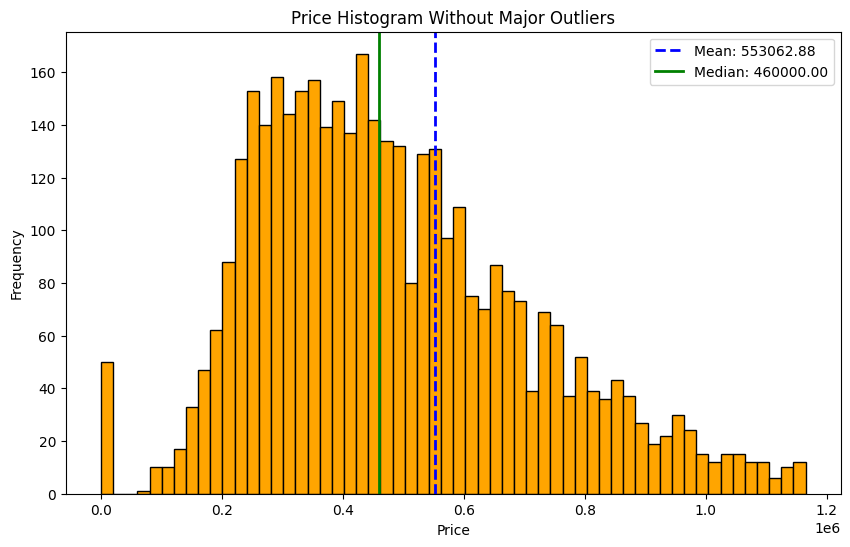

In [6]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define the range for non-outlier values
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to exclude outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to remove outliers for a specific column, e.g., 'column_name'
filtered_data_price = remove_outliers(data, 'price')

# Calculate mean and median of the filtered data
mean_price = data['price'].mean()
median_price = data['price'].median()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data_price['price'], bins = 58, color = 'orange', alpha = 1, edgecolor = "black")

# Add vertical line for mean
plt.axvline(mean_price, color = 'blue', linestyle = 'dashed', linewidth = 2, label = f'Mean: {mean_price:.2f}')

# Add vertical line for median
plt.axvline(median_price, color = 'green', linestyle = 'solid', linewidth = 2, label = f'Median: {median_price:.2f}')

# Titles and labels
plt.title('Price Histogram Without Major Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show legend for mean and median lines
plt.legend()

# Show the plot
plt.show()

###**Conclusion of Price Graph**

The graph does tell us many points that are also presented in the table from earlier. For example, the mode was defined as 0, which can be seen at value 0 with over 50 values under the category of price $0. The mean can also be visualized at nearly the middle of the entire graph, whereas the median is shifted to the left, signifying a right skewed curve and graph.

###**Comparing to another plot of information**###

When looking at another real estate data set that compares some similar assets, for example the price, we can see how our first dataset may be of relation to another dataset. Therefore, this new dataset is useful in complimenting our first one.

In [7]:
path2 = kagglehub.dataset_download("anthonypino/melbourne-housing-market")

print("Path to dataset files:", path2)

#Finding the name of the second file and where it's located
files2 = os.listdir(path2)
print("Files in dataset folder:", files2)

#Search the files for one that ends in .csv assuming theres no other ones
data2 = [j for j in files2 if j.endswith(".csv")]

#Running/ finding the second
if data2:
    csv_path2 = os.path.join(path2, data2[0])  # Get the first (and should be only) CSV file of Melbourne Housing
    data2 = pd.read_csv(csv_path2)

print(type(data2))

100%|██████████| 2.28M/2.28M [00:00<00:00, 108MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/anthonypino/melbourne-housing-market/versions/27
Files in dataset folder: ['Melbourne_housing_FULL.csv', 'MELBOURNE_HOUSE_PRICES_LESS.csv']


<class 'pandas.core.frame.DataFrame'>


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

###**Summary statistics of second dataset**###

This dataset has something that the original dataset didn't: missing information. To combat this, I want to use what information I have that doesn't have missing values to draw a conclusion, since the dataset stores hundreds of price values. An advantage however is the lack of prices that cost 0 dollars, as seen with the first dataset. The mode for this information is a high value of $600,000.

In [9]:
# Initialize a dictionary to hold the summary statistics for each column
summary_stats2 = {}

# Iterate over all columns in the DataFrame
for col in data2.columns:
    if data2[col].dtype in ['int64', 'float64']:  # Only compute stats for numerical columns
        summary_stats2[col] = {
            "Mean": data2[col].mean(),
            "Median": data2[col].median(),
            "Mode": data2[col].mode()[0],  # Mode can return multiple values, so we take the first
            "Range": data2[col].max() - data2[col].min(),
            "Std Dev": data2[col].std(),
            "NAs": data2[col].isna().sum()
        }

# Convert dictionary to DataFrame
summary_df2 = pd.DataFrame(summary_stats2).T  # Transpose for proper formatting

# Create a PrettyTable
pTable2 = PrettyTable()
pTable2.field_names = ["Column", "Mean", "Median", "Mode", "Range", "Std Dev", "NAs"]

# Add rows to PrettyTable
for col in summary_df2.index:
    pTable2.add_row([col] + list(summary_df2.loc[col]))

# Print the PrettyTable
print(pTable2)

+---------------+---------------------+----------+----------+--------------------+---------------------+---------+
|     Column    |         Mean        |  Median  |   Mode   |       Range        |       Std Dev       |   NAs   |
+---------------+---------------------+----------+----------+--------------------+---------------------+---------+
|     Rooms     |  3.0310124221820582 |   3.0    |   3.0    |        15.0        |  0.9699329348973645 |   0.0   |
|     Price     |  1050173.344955408  | 870000.0 | 600000.0 |     11115000.0     |  641467.1301046012  |  7610.0 |
|    Distance   |  11.18492942391554  |   10.3   |   11.2   |        48.1        |  6.788892455936133  |   1.0   |
|    Postcode   |  3116.062858618315  |  3103.0  |  3073.0  |       978.0        |  109.02390274290785 |   1.0   |
|    Bedroom2   |  3.0846471471471473 |   3.0    |   3.0    |        30.0        |  0.9806897285460696 |  8217.0 |
|    Bathroom   |  1.624798167549097  |   2.0    |   1.0    |        12.0       